# Graficos

## RTT over hops

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
import taller2
import seaborn as sns
import pandas as pd # name a more iconic duo
import matplotlib.pyplot as plt

In [52]:
sns.set_style("whitegrid")

In [53]:
# Levantamos los hops de alguna IP, extendemos con info geolocalizada, y graficamos
def get_df(ip: str):
    _, stats = taller2.deserialize(ip)
    taller2.extend_with_geo(stats)
    taller2.d_rtt(stats)
    
    df = pd.DataFrame(stats)
    df["hop"] = df.index
    return df[df["hop"] >= 1]

In [60]:
IP_DELHI = "14.139.45.149"
IP_CMU = "128.2.42.52"
IP_OSAKA = "133.1.138.1"

HOPS_OSAKA = 22
HOPS_DELHI = 15
HOPS_CMU = 15

df_osaka = get_df(IP_OSAKA)
df_cmu = get_df(IP_CMU)
df_delhi = get_df(IP_DELHI)

In [61]:
def rtt_over_hops(ax1, df: pd.DataFrame, hops: int):
    ax = sns.scatterplot(ax=ax1, data=df[df["hop"] <= hops], x="hop", y="median", hue="country_name", legend=False)
    ax.set(xlabel='Hop', ylabel='RTT (ms)')
    ax.set_title("RTT para cada hop")
    ax.set_xticks(range(1,hops+1))

def d_rtt_over_hops(ax1, df: pd.DataFrame, hops: int):
    ax = sns.scatterplot(ax=ax1, data=df[df["hop"] <= hops], x="hop", y="d_rtt", hue="country_name")
    ax.axhline(60, ls=':', lw=1.5, color="black")
    ax.set(xlabel='Hop', ylabel='dRTT (ms)')
    ax.set_title("dRTT para cada hop")
    ax.set_xticks(range(1,hops+1))

def plot_rtts(df, uni: str, ip: str, hops: int):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
    fig.suptitle(f"{uni} ({ip})")
    d_rtt_over_hops(ax1, df, hops)
    rtt_over_hops(ax2, df, hops)

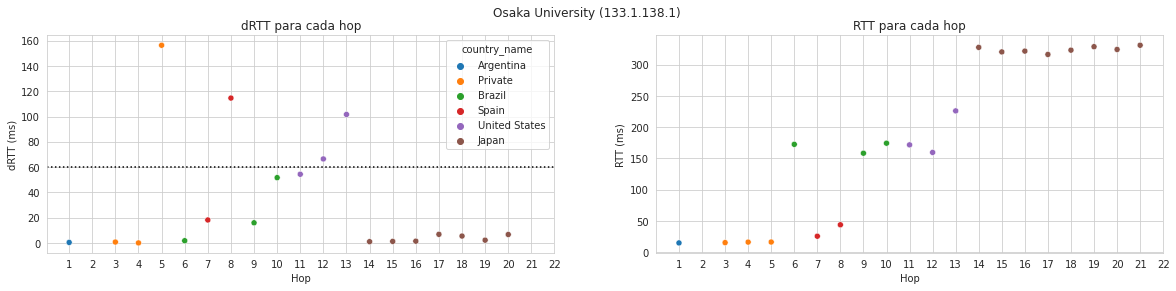

In [62]:
#rtt_over_hops(df, 15)
plot_rtts(df_osaka, "Osaka University", IP_OSAKA, HOPS_OSAKA)
plt.savefig("img/rtts-osaka.svg")

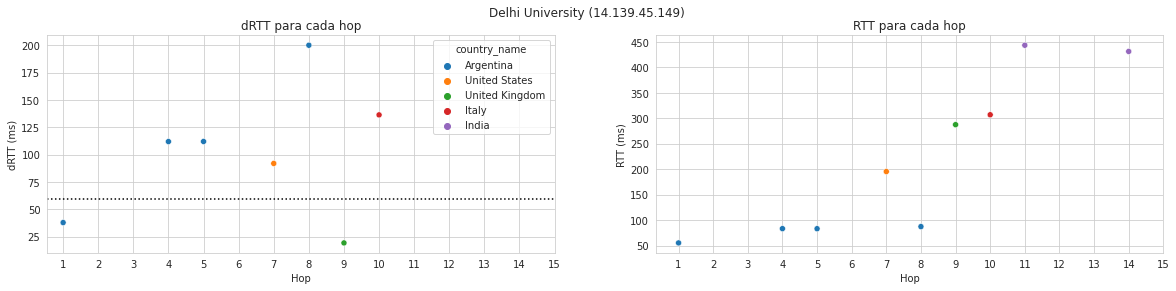

In [57]:
plot_rtts(df_delhi, "Delhi University", IP_DELHI, HOPS_DELHI)
plt.savefig("img/rtts-delhi.svg")

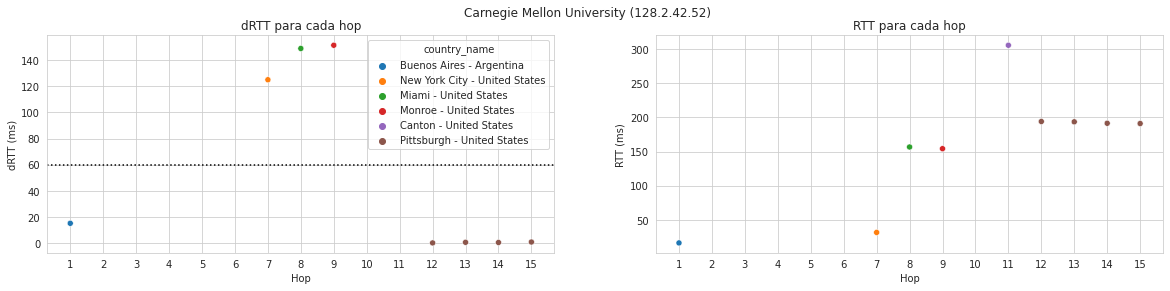

In [58]:
df_cmu["country_name"] = df_cmu["city"] + " - " + df_cmu["country_name"] 
plot_rtts(df_cmu, "Carnegie Mellon University", IP_CMU, HOPS_CMU)
plt.savefig("img/rtts-cmu.svg")